Getting the top 5 deals by funded amount:
Read the data from the Excel file into a pandas DataFrame.
Sort the DataFrame by the funded amount column in descending order.
Retrieve the top 5 rows to get the top 5 deals by funded amount.

In [ ]:
import pandas as pd


In [ ]:
# Read data from Excel file into DataFrame
deals_df = pd.read_csv('/content/Israeltheanalyst Bootcamp - Deal.csv')

In [ ]:
deals_df

,deal_id,funded_amount,funded_date,industry_id
0,a4Gf1000000nS5ZEAU,175000,4/3/2020,3
1,a4Gf1000000nS5jEAE,3800,5/21/2019,3
2,a4Gf1000000nS5nEAE,6600,9/25/2020,3
3,a4Gf1000000nS5pEAE,13000,4/27/2020,4
4,a4Gf1000000nS5uEAE,5600,3/14/2020,3
...,...,...,...,...
1300,a4Gf1000000nSo4EAE,15000,1/21/2018,1
1301,a4Gf1000000nSo5EAE,28000,11/9/2018,2
1302,a4Gf1000000nSo7EAE,12000,7/9/2020,2
1303,a4Gf1000000nSo9EAE,10000,1/25/2019,1


In [ ]:
# Sort DataFrame by funded amount in descending order
top_deals = deals_df.sort_values(by='funded_amount', ascending=False).head(5)

In [ ]:
print(top_deals)

                 deal_id  funded_amount funded_date  industry_id
1290  a4Gf1000000nSnZEAU         225000  11/28/2018            1
563   a4Gf1000000nSiXEAU         210000   11/1/2019            4
84    a4Gf1000000nSOiEAM         200000   6/25/2019            4
5     a4Gf1000000nS5vEAE         180000   8/12/2018            3
0     a4Gf1000000nS5ZEAU         175000    4/3/2020            3


Getting the total deals and average funded amount by industry:

In [ ]:
# Group data by industry and calculate total deals and average funded amount
industry_stats = deals_df.groupby('industry_id').agg({'deal_id': 'count', 'funded_amount': 'mean'})

print(industry_stats)

             deal_id  funded_amount
industry_id                        
1                218   21236.238532
2                415   16064.578313
3                262   15143.129771
4                410   19741.170732


Building a visual trended view showing funded amount per industry by year and quarter:

In [ ]:
print(deals_df['funded_date'].dtype)

object


In [ ]:
deals_df['funded_date'] = pd.to_datetime(deals_df['funded_date'])

In [ ]:
# Create 'Year' column
deals_df['Year'] = deals_df['funded_date'].dt.year

# Create 'Quarter' column
deals_df['Quarter'] = deals_df['funded_date'].dt.quarter

print(deals_df.head())

              deal_id  funded_amount funded_date  industry_id  Year  Quarter
0  a4Gf1000000nS5ZEAU         175000  2020-04-03            3  2020        2
1  a4Gf1000000nS5jEAE           3800  2019-05-21            3  2019        2
2  a4Gf1000000nS5nEAE           6600  2020-09-25            3  2020        3
3  a4Gf1000000nS5pEAE          13000  2020-04-27            4  2020        2
4  a4Gf1000000nS5uEAE           5600  2020-03-14            3  2020        1


In [ ]:
# Group data by industry, year, and quarter and calculate sum of funded amount
industry_trend = deals_df.groupby(['industry_id', 'Year', 'Quarter'])['funded_amount'].sum().reset_index()


In [ ]:
print(industry_trend)

    industry_id  Year  Quarter  funded_amount
0             1  2018        1         404200
1             1  2018        2         228700
2             1  2018        3         476200
3             1  2018        4         535800
4             1  2019        1         374100
5             1  2019        2         430600
6             1  2019        3         118000
7             1  2019        4         519200
8             1  2020        1         567600
9             1  2020        2         290800
10            1  2020        3         348600
11            1  2020        4         335700
12            2  2018        1         588600
13            2  2018        2         525600
14            2  2018        3         685000
15            2  2018        4         604400
16            2  2019        1         512400
17            2  2019        2         256600
18            2  2019        3         501000
19            2  2019        4         532000
20            2  2020        1    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

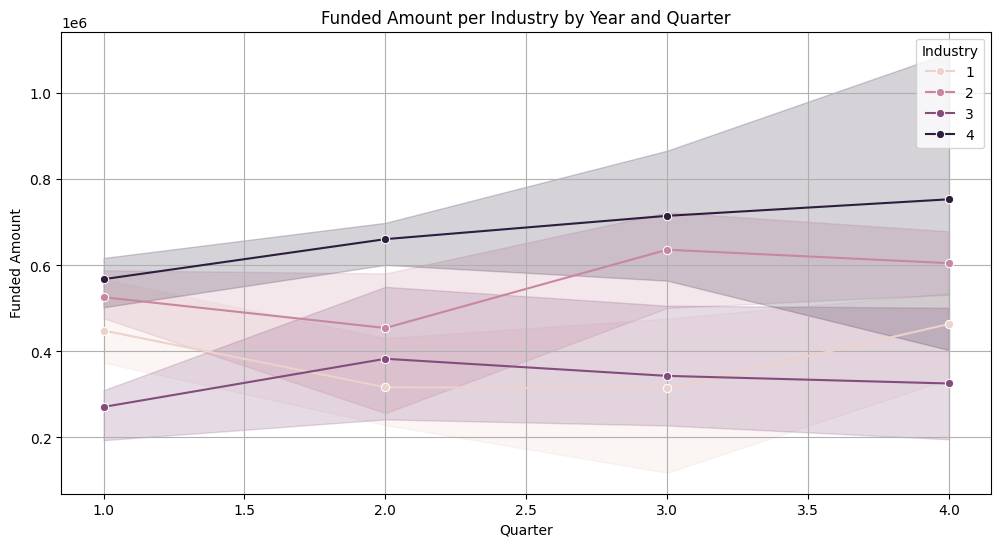

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=industry_trend, x='Quarter', y='funded_amount', hue='industry_id', marker='o')
plt.title('Funded Amount per Industry by Year and Quarter')
plt.xlabel('Quarter')
plt.ylabel('Funded Amount')
plt.legend(title='Industry')
plt.grid(True)
plt.show()

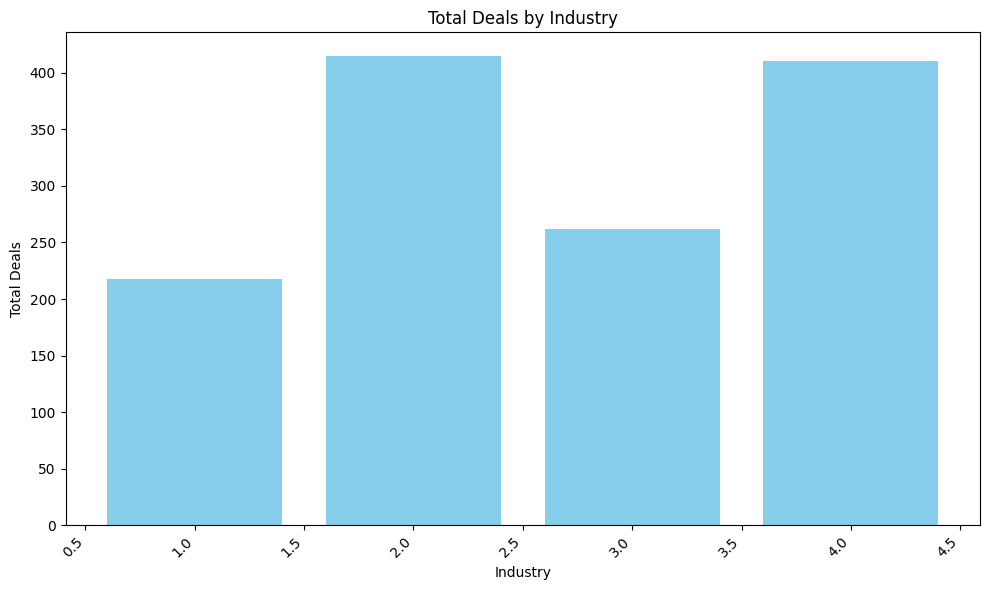

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(industry_stats.index, industry_stats['deal_id'], color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Total Deals')
plt.title('Total Deals by Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()